## Exploratory Data Analysis

### Setup

In [1]:
!pip install plotly
!pip install seaborn

     |████████████████████████████████| 293 kB 533 kB/s eta 0:00:01
  Using cached numpy-1.24.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
     |████████████████████████████████| 3.3 MB 1.8 MB/s eta 0:00:01     |█▋                              | 163 kB 916 kB/s eta 0:00:04     |██▍                             | 245 kB 916 kB/s eta 0:00:04     |███                             | 317 kB 916 kB/s eta 0:00:04     |███▉                            | 399 kB 916 kB/s eta 0:00:04     |██████████▏                     | 1.1 MB 916 kB/s eta 0:00:03     |█████████████▊                  | 1.4 MB 916 kB/s eta 0:00:03     |███████████████████████▋        | 2.4 MB 1.8 MB/s eta 0:00:01
ERROR: numba 0.56.4 has requirement numpy<1.24,>=1.18, but you'll have numpy 1.24.3 which is incompatible.
ERROR: aimetcommon torch-cpu-1.24.0 has requirement Jinja2==3.0.3, but you'll have jinja2 3.1.2 which is incompatible.
ERROR: aimetcommon torch-cpu-1.24.0 has requirement pandas==1.4.3, but you

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [10]:
df = pd.read_csv("../results/test.csv")
df.head()

,Unnamed: 0,type,name,description,rating,votes,metascore,imdb_ratings,duration,year,genre,actor,director
0,0,movie,Harry Potter and the Sorcerer's Stone,An orphaned boy enrolls in a school of wizardr...,PG,806214,65.0,7.6,152.0,2001,"Adventure,Family,Fantasy","Daniel Radcliffe,Rupert Grint,Richard Harris,M...",Chris Columbus
1,1,movie,Dune,A Duke's son leads desert warriors against the...,PG-13,667424,74.0,8.0,137.0,1984,"Action,Adventure,Drama","Timothée Chalamet,Rebecca Ferguson,Zendaya,Osc...",Denis Villeneuve
2,2,movie,Spider-Man: No Way Home,"With Spider-Man's identity now revealed, Peter...",PG-13,789578,71.0,8.2,148.0,2021,"Action,Adventure,Fantasy","Tom Holland,Zendaya,Benedict Cumberbatch,Jacob...",Jon Watts
3,3,movie,Guardians of the Galaxy,A group of intergalactic criminals must pull t...,PG-13,1202904,76.0,8.0,121.0,2014,"Action,Adventure,Comedy","Chris Pratt,Vin Diesel,Bradley Cooper,Zoe Saldana",James Gunn
4,4,movie,The Northman,A young Viking prince is on a quest to avenge ...,R,226018,82.0,7.0,137.0,2022,"Action,Adventure,Drama","Alexander Skarsgård,Nicole Kidman,Claes Bang,E...",Robert Eggers


In [11]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3221 non-null   int64  
 1   type          3221 non-null   object 
 2   name          3221 non-null   object 
 3   description   3221 non-null   object 
 4   rating        3186 non-null   object 
 5   votes         3221 non-null   int64  
 6   metascore     3221 non-null   float64
 7   imdb_ratings  3221 non-null   float64
 8   duration      3220 non-null   float64
 9   year          3221 non-null   int64  
 10  genre         3221 non-null   object 
 11  actor         3221 non-null   object 
 12  director      3221 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 327.3+ KB


,Unnamed: 0,votes,metascore,imdb_ratings,duration,year
count,3221.000000,3.221000e+03,3221.000000,3221.000000,3220.00000,3221.000000
mean,1610.000000,1.681631e+05,59.447998,6.678237,111.88882,2003.683018
std,929.966935,2.590012e+05,17.198138,0.993286,22.24697,17.218629
min,0.000000,3.100000e+01,1.000000,2.100000,44.00000,1930.000000
25%,805.000000,2.204100e+04,48.000000,6.100000,96.00000,1995.000000
50%,1610.000000,7.067400e+04,60.000000,6.800000,108.00000,2008.000000
75%,2415.000000,2.021550e+05,72.000000,7.400000,124.00000,2017.000000
max,3220.000000,2.734415e+06,100.000000,9.300000,317.00000,2023.000000


In [12]:
df['cnt']=1

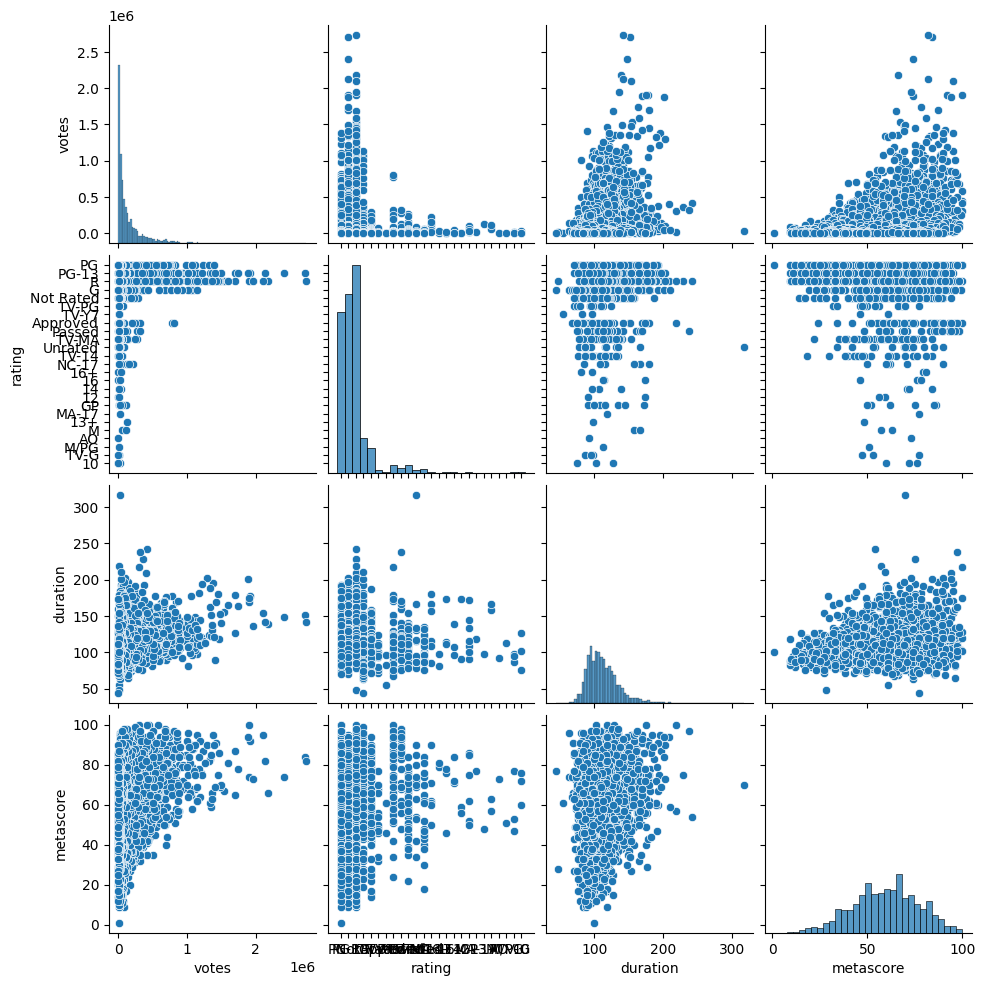

In [13]:
sns.pairplot(data=df, vars=["votes","rating", "duration","metascore"])
plt.show()

In [15]:
px.scatter(df, x='year',y='votes',size='votes', 
           color = 'rating',hover_name='name', animation_frame='year',
           title="Distribution of Year and Votes")

In [17]:
df[['genre1', 'genre2','genre3']] = df['genre'].str.split(',', 3, expand=True).fillna(value="")
df[['actor1', 'actor2','actor3']] = df['actor'].str.split(',', 2,expand=True).fillna(value="")

df['genre2']=df['genre2'].fillna(df.genre1, inplace=True)
df['genre3']=df['genre3'].fillna(df.genre1,inplace=True)

/tmp/ipykernel_3612/1632007089.py:1: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.

/tmp/ipykernel_3612/1632007089.py:2: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.



In [18]:
df_by_genre1 = df.groupby('genre1')
df_by_genre2 = df.groupby('genre2')
df_by_genre3 = df.groupby('genre3')

agg_genre1=df_by_genre1.sum()
agg_genre2=df_by_genre2.sum()
agg_genre3=df_by_genre3.sum()

ge1_ge2 = agg_genre1.add(agg_genre2, fill_value=0.0)
final_genre = ge1_ge2.add(agg_genre3, fill_value=0.0)
genre_temp=final_genre.reset_index().head(10)
genre_temp

/tmp/ipykernel_3612/4102510318.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_3612/4102510318.py:6: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

/tmp/ipykernel_3612/4102510318.py:7: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,genre1,Unnamed: 0,votes,metascore,imdb_ratings,duration,year,cnt
0,Action,1653931.0,215410028.0,53453.0,6311.4,114632.0,1974572.0,985.0
1,Adventure,1252399.0,53900951.0,31895.0,3650.5,62297.0,1141007.0,571.0
2,Animation,1025074.0,54450805.0,32702.0,3559.8,49555.0,1063987.0,530.0
3,Biography,181375.0,39552748.0,16121.0,1766.5,30714.0,487846.0,243.0
4,Comedy,356933.0,47155424.0,18917.0,2097.3,33166.0,618474.0,309.0
5,Crime,87345.0,40415589.0,7280.0,793.7,13726.0,218623.0,109.0
6,Documentary,49686.0,314395.0,1742.0,178.9,2268.0,46286.0,23.0
7,Drama,460904.0,70571257.0,23615.0,2519.9,43647.0,710378.0,355.0
8,Family,838.0,208487.0,67.0,7.8,100.0,1971.0,1.0
9,Fantasy,3388.0,659199.0,141.0,19.5,337.0,5980.0,3.0


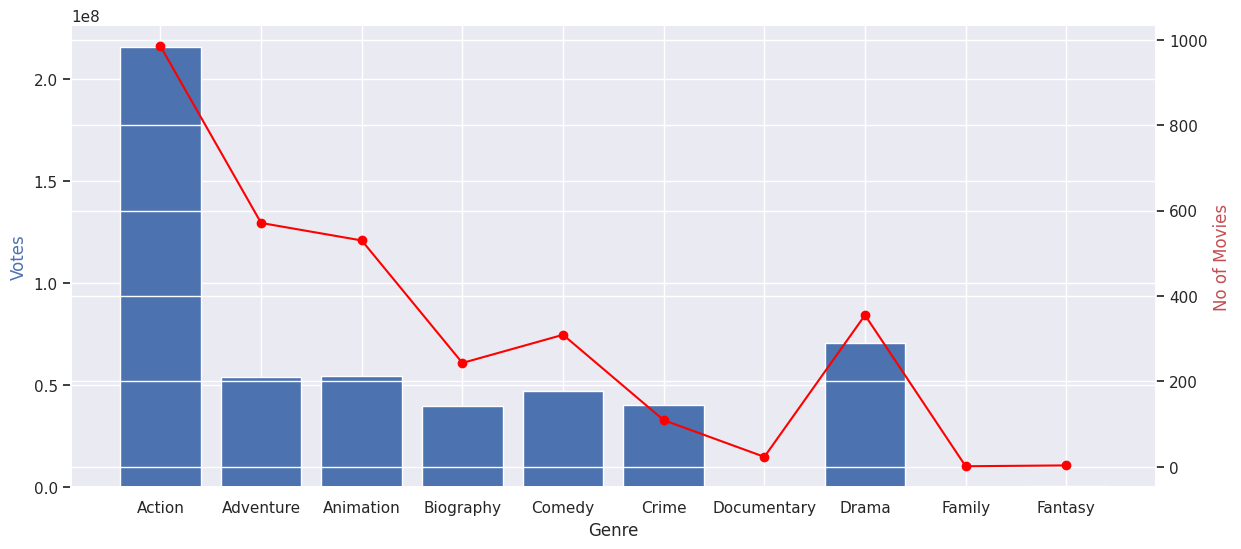

In [19]:
sns.set(style="darkgrid")

fig, ax1 = plt.subplots(figsize = (14,6))

ax2 = ax1.twinx()
ax1.bar(genre_temp['genre1'], genre_temp['votes'])
ax2.plot(genre_temp['genre1'], genre_temp['cnt'], 'o-', color="red" )
ax1.set_xlabel('Genre')
ax1.set_ylabel('Votes', color='b')
ax2.set_ylabel('No of Movies', color='r')
plt.show()

In [20]:
df_year = df.groupby('year')['cnt'].count().reset_index()
px.line(df_year, x='year',y='cnt',template='plotly_dark',text='cnt',
        title="No of releases in Year")

In [25]:
df_Rev = df.groupby('year')['votes'].sum().round(1).reset_index()
px.line(df_Rev, x='year',y='votes',template='plotly_dark', title="Votes in Years")

In [26]:
df_2022 = df[df['year']==2022].copy()
df_temp=df_2022.sort_values(by='imdb_ratings',ascending = False).head(10)
px.bar(df_temp, y='imdb_ratings', x='name',color='genre1',text='rating',
       title='Most successful Movies/Genre of Year:2022')

/tmp/ipykernel_3612/1177774104.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




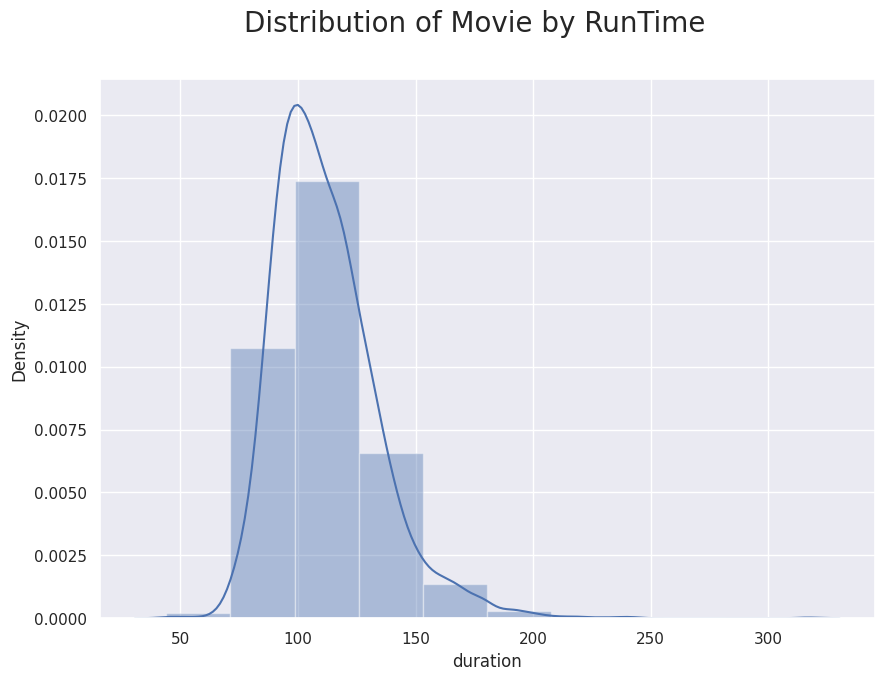

In [27]:
plt.figure(figsize=(10,7),facecolor='white')
sns.distplot(df['duration'],bins=10,kde=True)
plt.suptitle("Distribution of Movie by RunTime", fontsize=20)
plt.show()

In [28]:
movies_Rev=df.sort_values(by='imdb_ratings',ascending = False)[0:10]
px.pie(movies_Rev, values='imdb_ratings', names='actor1',title='Actors vs Rating Distribution')

In [31]:
px.bar(movies_Rev,x='actor1',y='metascore', color='votes',
       hover_name='name', text='rating',template='plotly_dark')

In [32]:
top_director= df.groupby('director')['imdb_ratings'].sum().reset_index()
top_director.sort_values('imdb_ratings',ascending =False)[0:5]

,director,imdb_ratings
1608,Steven Spielberg,195.2
322,Clint Eastwood,144.7
1395,Ridley Scott,122.5
1094,Martin Scorsese,109.8
1433,Robert Zemeckis,99.9


In [35]:
px.bar(movies_Rev, x='director',y='votes',
       color='metascore',hover_name='name',
       template='plotly_dark', title='Top Directors and Votes by Metascore')

In [36]:
movies_Votes=df.sort_values(by='votes',ascending = False)[0:20]

In [38]:
px.bar(movies_Votes, x='name',y='votes',color='imdb_ratings',
       hover_name='name', template='plotly_dark',
      title='Most Popular/Voted Movies')

In [40]:
top_Actor = pd.pivot_table(df, index=['actor1'],
                           values=['imdb_ratings','metascore','votes','cnt'],
                           aggfunc={'imdb_ratings':np.sum,'metascore':np.mean,
                                    'votes':np.mean,'cnt':np.sum})

In [41]:
actor = top_Actor.sort_values(by='imdb_ratings',
                              ascending = False).reset_index()[0:20]
actor

,actor1,cnt,imdb_ratings,metascore,votes
0,Tom Hanks,25,186.6,71.280000,459740.560000
1,Tom Cruise,21,148.8,64.285714,364777.428571
2,Sean Connery,22,147.2,62.772727,92299.272727
3,Brad Pitt,20,145.1,60.900000,434302.600000
4,Kevin Costner,19,133.8,56.842105,113515.684211
5,Johnny Depp,19,132.1,56.894737,350153.421053
6,Christian Bale,18,131.3,65.444444,580573.000000
7,Jake Gyllenhaal,18,126.5,63.833333,248799.611111
8,Nicolas Cage,20,124.0,51.450000,116709.950000
9,Leonardo DiCaprio,16,123.2,67.312500,838937.687500


In [42]:
px.scatter(actor,y= 'votes',x= 'imdb_ratings', 
           color= 'cnt',size='imdb_ratings',
           title='Votes Vs Rating of most Popular Actor and No of Movies')